# Getting Started in Machine Learning 

## Chapter 2: Multilinear Regression

This notebook contains examples from the book: 

_Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter_ (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019. 



    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

# multiple linear regression with sklearn

In [1]:
import numpy as np
import pandas as pd

## Read the Computer Hardware Data Set

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",
                  header=None)
data.columns=["vendor","Model","MYCT","MMIN", "MMAX","CACH","CHMIN",
              "CHMAX","PRP","ERP"]
data[:5]

,vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


## Extract X and Y data and convert to arays

In [4]:
X=np.array(data[["MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX"]])
Y=np.array(data["PRP"])
ndata=len(X)
print(ndata)

209


In [5]:
X[:3]

array([[  125,   256,  6000,   256,    16,   128],
       [   29,  8000, 32000,    32,     8,    32],
       [   29,  8000, 32000,    32,     8,    32]])

## divide into test and training sets

In [6]:
import random
indices=list(range(ndata))
random.shuffle(indices)
ntrain=round(.75*ndata)
training_indices=indices[:ntrain]
test_indices=indices[ntrain:]

In [7]:
XTRAIN=X[training_indices]
YTRAIN=Y[training_indices].reshape(-1,1)
XTEST=X[test_indices]
YTEST=Y[test_indices].reshape(-1,1)

## Display some of the data

In [8]:
print(XTRAIN[:3])
print(YTRAIN[:3])

[[ 320  256 6000    0    1    6]
 [ 140 2000 4000    0    4    8]
 [ 810  512  512    8    1    1]]
[[33]
 [40]
 [18]]


## Multilinear regression with scikit learn

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
r=LinearRegression().fit(XTRAIN,YTRAIN)

In [11]:
r

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(r.intercept_)

[-63.35970158]


In [13]:
print(r.coef_)

[[ 0.05512868  0.01538459  0.00656091  0.44690686 -0.66659249  1.54997284]]


## Make a prediction with sklearn

In [14]:
P=r.predict(XTEST)

In [15]:
R2=r2_score(YTEST,P)
MSE = mean_squared_error(YTEST,P)
print(R2,MSE)

0.6761110787144958 3570.4906192972503


## Define functions to calculate the Normal matrix

In [16]:
def Normal_Matrix(xdata, ydata):
    if xdata.ndim != 2:
        print("Not a 2x2 array")
        return(float("NAN"))
    nrows,ncols=xdata.shape
    column_ones=np.ones((nrows,1))
    A=np.hstack((column_ones, xdata))

    AT=A.T
    N=AT.dot(A)
    ATy = AT.dot(ydata)
    
    return(N,ATy)
N, ATY=Normal_Matrix(XTRAIN,YTRAIN)

In [17]:
import numpy.linalg

In [18]:
sol=numpy.linalg.solve(N,ATY)
sol

array([[-6.33597016e+01],
       [ 5.51286788e-02],
       [ 1.53845925e-02],
       [ 6.56091453e-03],
       [ 4.46906859e-01],
       [-6.66592491e-01],
       [ 1.54997284e+00]])

In [19]:
s=np.around(np.linalg.solve(N,ATY),3)
s

array([[-6.336e+01],
       [ 5.500e-02],
       [ 1.500e-02],
       [ 7.000e-03],
       [ 4.470e-01],
       [-6.670e-01],
       [ 1.550e+00]])

In [20]:
def predicted_values(coefficients, xvalues):
    n=len(coefficients)
    nvectors, nfeatures=xvalues.shape
    if n!= nfeatures+1:
        print("The number of coefficients is",n,"the vectors have length",nfeatures)
        return(float("NAN"))
    output=[]
    for vector in xvalues:
        U=np.append([1],vector)
        y=float(U.dot(coefficients))
        output.append(y)
    output=np.array(output).reshape(-1,1)
    return (output)
PRE=predicted_values(sol,XTEST)

In [21]:
def MSS(YO, YP):
    n=len(YP)
    return(float(sum((YO-YP)**2)/n))
def TSS(YOBS):
    ybar = np.mean(YOBS)
    return(float(sum((ybar-YOBS)**2)))

In [22]:
print("An estimate of the MSE using the Normal Equations is ",MSS(YTEST, PRE))

An estimate of the MSE using the Normal Equations is  3570.4906192972785


In [23]:
def MYR2(YOBS,YPRE):
    n=len(YOBS)
    rss=n*MSS(YOBS,YPRE)
    tss=TSS(YOBS)
    return(1-rss/tss)
print("An estimate of R^2 is", MYR2(YTEST,PRE))

An estimate of R^2 is 0.6761110787144933


## Use model_selection train_test_split

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
X=np.array(data[["MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX"]])
Y=np.array(data["PRP"]).reshape(-1,1)

In [92]:
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X,Y)

In [93]:
LR=LinearRegression()
reg=LR.fit(XTRAIN,YTRAIN)
print("The intercept is ", reg.intercept_)

The intercept is  [-62.03636686]


In [94]:
print("The coefficients are\n", reg.coef_)

The coefficients are
 [[ 0.06104161  0.01466434  0.00527632  1.02699926 -1.77763521  1.94911414]]


In [45]:
YP=reg.predict(XTEST)
R2=r2_score(YTEST,YP)
MSE = mean_squared_error(YTEST,YP)
print("R^2=",round(R2,3)," MSE=",round(MSE,3))

R^2= 0.829  MSE= 6267.859


## How important is the randomization??

In [65]:
r2s=[]
MSES=[]
n=2000
for j in range(n):
    XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X,Y)
    LR=LinearRegression()
    reg=LR.fit(XTRAIN,YTRAIN)
    YP=reg.predict(XTEST)
    R2=r2_score(YTEST,YP)
    MSE = mean_squared_error(YTEST,YP)
    r2s.append(R2)
    MSES.append(MSE)
print(np.mean(r2s), np.std(r2s))
print(np.mean(MSES), np.std(MSES))

0.7595722806940398 0.16102561783547503
5313.946885768998 3419.738741403978


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

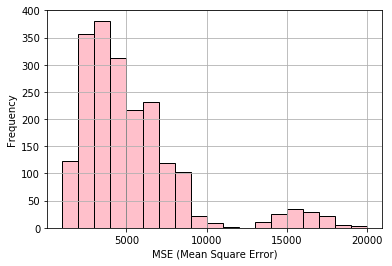

In [97]:
plt.hist(MSES,color="pink",edgecolor="black",bins=np.linspace(1000,20000,20));
#plt.yscale("log")
#plt.yticks([1,3,10,30,100,300,1000],[1,3,10,30,100,300,1000]);
plt.xticks(range(5000,25000, 5000));
plt.grid()
plt.xlabel("MSE (Mean Square Error)")
plt.ylabel("Frequency")
fig=plt.gcf()
fig.savefig("MSE-Histogram-Multilinear-Regression.pdf")

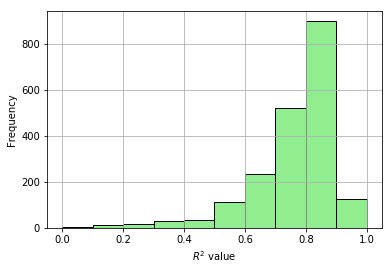

In [98]:
plt.hist(r2s,color="lightgreen",edgecolor="black", bins=np.linspace(0,1,11));
#plt.yscale("log")
plt.grid()
plt.xlabel("$R^2$ value")
plt.ylabel("Frequency")
fig=plt.gcf()
fig.savefig("R2-Histogram-Multilinear-Regression.pdf")